In [42]:
%matplotlib inline

<h1 class="title">Text Classification and Clustering</h1>
<ul>
<li>Research Seminar Information Retrieval
<li>Humboldt-University Berlin
<li>2015-07-01
<li>Stefan Baerisch
<ul/>

# Gliederung
- **Einleitung** - Von was reden wir und warum
- **Machine Learning** - Gemeinsame Grundlagen von *Classification* und *Clustering*
- **Eigenschaften von Texte** - Darstellung von Texten und *Feature Engineering*
- **Clustering** - Als ein Beispiel von *Non-Supervised* Machine Learning. Mit *Hierarchical Clustering* und k-Means Clustering als Beispiele*
- **Classification** - Als ein Beispiel von *Supervised* Learning. Mit *k-nearest Neighbors*, *Naive Bayes* und *Decision Trees* als Beispiel.
- **Abschluss und Ausblick** - Ein  Rückschau und Themen, die sonst nicht gepasst haben.

## Was ist Machine Learning

* *Machine Learning* ist ein automatisiertes Verfahren, das auf Grundlage eines *Modells* Aussagen zu Eingaben macht.
* Eingaben können, Texte, Bilder, Zahlen, Sprache sein.
* Ausgaben können Vorhersagen zu Werten, Klassenzugehörigkeiten, oder Steuerungsbefehle sein.
* *Learning* weil das Modell trainiert wird, in der Regel durch Beispieldaten.

Classification und Clustering sind zwei Beispiele. Zahlreiche andere existieren.

## Wie wird Machine Learning verwendet?

* **Online Werbung** - Die schnelle Entscheidung aufgrund zahlreicher Daten (Profil und aktuelle Eingaben), welche Werbenachricht die höchste Erfolgschance hat.
* **Wartungsvorhersage** - Für komplexe Maschinen mit Telemetrie, wie lässt sich ein Problem vorhersagen?
* Vorhersage von Erkrankungen aus Suchanfragen (Flu Trends) und Schwangerschaften aus der Kaufhistorie (Target)
* Spracherkennung, Bilderkennung und Übersetzung

Machine Lerning wird oft vorhersagend eingesetzt. 

## Was ist dieser Vortrag und wofür ist er gut?

- Dies ist ein sehr schneller Überblick zu Classification und Clustering, mit etwas Machine Learning als Hintergrund
- Sie sollten Folgendes mitnehmen:
    - Klassifizierung und Clustering sind nicht kompliziert
    - Es gibt eine ganze Reihe möglicher Verfahren
    - Die Vorbereitung von Daten ist entscheidend für die Ergebnisse, speziell für Texte


## Zum Aufbau und Inhalt

- Ich verwende englische Begriffe wo diese geläufiger sind. 
- Die Präsentation steht zum Download auf [Github](https://github.com/stbaercom/150627_hu_slides).
- Der Beispielcode ist Python 2. Ich empfehle [Anaconda](http://continuum.io/downloads)
- Die Testdaten sind der _4 Universities Data Set_, [hier](http://www.cs.cmu.edu/afs/cs/project/theo-20/www/data/) zum Download


##Quellcode und Praxis
- Einige Folien enthalten Quellcode. Das ist für jene, die es interessiert.
- Für die Nichtprogrammier - Einfach zuhören. Es ist weniger kompliziert, als es aussieht

## Ein Beispiel für Code

In [43]:
# Baseline Classifier : Weist jedem Wert die häufigste Klasse zu.
from collections import Counter
model = Counter()
def fit(value, cls):
    model.update([cls])
def predict(value):
    return model.most_common(1)[0][0]

In [75]:
#Drei Aufrufe von train, 
fit("Banana","fruit")
fit("Apple","fruit")
fit("Bean","Vegetable")
predict("Bean")

'fruit'

# Machine Learning

## Modelle und Einsatz von Modellen 1
- Ein Modell ist eine **Vereinfachung** zu einem bestimmten **Zweck**
- Ein Beispiel sind Karten in unterschiedlichen Maßstäben und mit unterschiedlichen Darstellungen
- Jedes Modell ist ein Kompromiss
    - Qualität der Vorhersagen
    - Komplexität und Verständlichkeit
    - Laufzeitverhalten
    - Aufwand der Implementierung
    - Folgen von Fehlern


## Modelle und Einsatz von Modellen 2
- Modelle werden vorbereitet, trainiert und evaluiert
- Dies geschieht in einem iterativen Prozess
- Alle Schritte sind wichtig

<center>
<img class="logo" src="bilder/prozess.png" class="bspic" width=700 />
<span>Data Science Prozess. Angepasst aus aus Data Science for Business, O'Reilly Media, 2013</span>
</center>

## Modelle und Einsatz von Modellen 3
- **Problem verstehen** Der wichtigste Punkt, und organisatorisch der schwierigste
- **Daten verstehen** Was für Überraschungen gibt es in den Daten?
- **Daten vorbereiten** In der Praxis häufig am Aufwendigsten
- **Modell erstellen** 
    - Auswahl der Verfahrens
    - Parametrisierung des Modells
    - Ausführungen des Trainings
- **Modell erproben** Wie gut ist das Modell auf Trainingsdaten und auf Testdaten?
- **Modell einsetzen** Dies kann mit einer technischen Reimplementierung einhergehen.

## Features und Werte

- Feature sind jene Eigenschaften von Entitäten/Documenten, mit denen Modelle arbeiten
- Features entstehen erst durch Extraktion und Transformation
- Intern findet eine Umwandlung in Zahlen statt, dies können wir hier ignorieren
- Die Anzahl der Feature ist die Dimensionalität der Daten
    - Text ist hochdimensional

# Besondere Eigenschaften von Texten

## Beispiel für den Vortrag
- Der webkb Datenbestand besteht aus Universitätswebseiten vom Ende der 90er Jahre
- Ursprüngliche Anwendung war die Klassifizierung nach der Art der Seite
    - Person, Lehrveranstaltung, etc...
- Die Daten liegen als HTML vor, insgesamt ~8000 Dokumente

In [76]:
!tree webkb | head -n15

webkb
├── course
│   ├── cornell
│   │   ├── http:^^cs.cornell.edu^Info^Courses^Current^CS415^CS414.html
│   │   ├── http:^^cs.cornell.edu^Info^Courses^Fall-95^CS415^CS415.html
│   │   ├── http:^^cs.cornell.edu^Info^Courses^Spring-96^CS432^cs432.html
│   │   ├── http:^^simon.cs.cornell.edu^Info^Courses^Current^CS401^
│   │   ├── http:^^simon.cs.cornell.edu^Info^Courses^Spring-96^CS515^
│   │   ├── http:^^www.cs.cornell.edu^Info^Courses^Current^CS100A^home.html
│   │   ├── http:^^www.cs.cornell.edu^Info^Courses^Current^CS100B^home.html
│   │   ├── http:^^www.cs.cornell.edu^Info^Courses^Current^CS211^home.html
│   │   ├── http:^^www.cs.cornell.edu^Info^Courses^Current^CS212^CS212.html
│   │   ├── http:^^www.cs.cornell.edu^Info^Courses^Current^CS212^outline.html
│   │   ├── http:^^www.cs.cornell.edu^Info^Courses^Current^CS280^CS280.html
│   │   ├── http:^^www.cs.cornell.edu^Info^Courses^Current^CS314^


## Ein Beispieldokument

In [46]:
filename = './webkb/course/cornell/http:^^cs.cornell.edu^Info^Courses^Current^CS415^CS414.html'
from IPython.display import IFrame
IFrame(filename, width=700, height=500)

## Feature Extraction für Texte
- Texte müssen für die hier besprochenen Verfahren in eine passende Form gebraucht werden
- Dies umfasst technische und inhaltliche Vorbereitung
    - Entfernen von HTML Tags
    - Aufteilung in Terme oder N-Grams
    - Löschen von nicht relevanten oder störenden Inhalten
    - Verkleinerung des Vokabulars
    - Umwandeln in eine Dokument-Term Matrix
    - Festlegung der Termgewichte in der Matrix durch entsprechende Vor-Verarbeitung

## Die ersten 1000 Zeichen des ersten Dokuments

In [47]:
txt_1 = open(filename).read()
txt_1[:1000]


'MIME-Version: 1.0\r\nServer: CERN/3.0\r\nDate: Sunday, 01-Dec-96 19:26:46 GMT\r\nContent-Type: text/html\r\nContent-Length: 1973\r\nLast-Modified: Tuesday, 26-Nov-96 18:07:47 GMT\r\n\r\n<html> <head>\n<title>CS414 Home Page</title>\n</head>\n\n<body>\n<center><img src = "Icons/cs414.gif"></center>\n<center><h2>CS414: Systems Programming and Operating Systems</h1></center>\n<center><h2>\n<a href = "cs415.html">CS415 Practicum in Operating System</a>\n</h2></center>\n<center><h2>Kenneth P. Birman</h2></center>\n<hr>\n\n<h3><a href = "news://newsstand.cit.cornell.edu/cornell.class.cs414">CS414/415 News Group</a></h3>\n\n<h3><a href = "syllabus.ps">Course Syllabus</a></h3>\n\n<h3>Lecture Notes</h3>\n<ul>\n  <li><a href = "filesys.ps">Unix Filesystem Structure</a>\n  <li><a href = "linking.ps">Linking (Static and Dynamic)</a>\n</ul>\n\n<h3>Assignments</h3>\n<ul>\n  <li><a href = "hw1.ps">Homework 1</a>\n  <li><a href = "hw2.ps">Homework 2</a>\n  <li><a href = "hw3.ps">Homework 3</a>\n  <li

## Entfernen der HTML Tags

In [48]:
from bs4 import BeautifulSoup
txt_2 = BeautifulSoup(txt_1).get_text()
txt_2

u'MIME-Version: 1.0\r\nServer: CERN/3.0\r\nDate: Sunday, 01-Dec-96 19:26:46 GMT\r\nContent-Type: text/html\r\nContent-Length: 1973\r\nLast-Modified: Tuesday, 26-Nov-96 18:07:47 GMT\r\n\r\n \nCS414 Home Page\n\nCS414: Systems Programming and Operating Systems\n\nCS415 Practicum in Operating System\n\nKenneth P. Birman\n\nCS414/415 News Group\nCourse Syllabus\nLecture Notes\n\nUnix Filesystem Structure\nLinking (Static and Dynamic)\n\nAssignments\n\nHomework 1\nHomework 2\nHomework 3\nHomework 4\nHomework 6\n\nAssignment Solutions\n\nSolution 1\nSolution 2\nSolution 4\nSolution 5\n\nPrelim 1 Solution\n\nTAs\n\nLiLi\n     5162 Upson Hall\n     Phone: 255-7421\n     E-Mail: \n     lili@cs.cornell.edu\n     Office Hours: Wednesday and Friday 3:30-5:00\nYi-Cheng Huang\n     5151 Upson Hall\n     Phone: 255-3042\n     E-Mail: \n     ychuang@cs.cornell.edu\n     Office Hours: Tuesday and Thursday 2:00-3:30\nMihai Budiu\n     4132 Upson Hall\n     Phone: 255-1179\n     E-Mail: \n     budiu@cs.c

## Umwandlung in Tokens

In [49]:
import nltk
tokens_1 = nltk.word_tokenize(txt_2)
print tokens_1
print len(tokens_1)

[u'MIME-Version', u':', u'1.0', u'Server', u':', u'CERN/3.0', u'Date', u':', u'Sunday', u',', u'01-Dec-96', u'19:26:46', u'GMT', u'Content-Type', u':', u'text/html', u'Content-Length', u':', u'1973', u'Last-Modified', u':', u'Tuesday', u',', u'26-Nov-96', u'18:07:47', u'GMT', u'CS414', u'Home', u'Page', u'CS414', u':', u'Systems', u'Programming', u'and', u'Operating', u'Systems', u'CS415', u'Practicum', u'in', u'Operating', u'System', u'Kenneth', u'P.', u'Birman', u'CS414/415', u'News', u'Group', u'Course', u'Syllabus', u'Lecture', u'Notes', u'Unix', u'Filesystem', u'Structure', u'Linking', u'(', u'Static', u'and', u'Dynamic', u')', u'Assignments', u'Homework', u'1', u'Homework', u'2', u'Homework', u'3', u'Homework', u'4', u'Homework', u'6', u'Assignment', u'Solutions', u'Solution', u'1', u'Solution', u'2', u'Solution', u'4', u'Solution', u'5', u'Prelim', u'1', u'Solution', u'TAs', u'LiLi', u'5162', u'Upson', u'Hall', u'Phone', u':', u'255-7421', u'E-Mail', u':', u'lili', u'@', u'cs.co

## Löschen von nicht relevanten Tokens nach Struktur

In [50]:
import re
tokens_2 = [t.lower() for t in tokens_1 if not re.match(r"[^a-zA-Z]",t)]
print tokens_2
print len(tokens_2)

[u'mime-version', u'server', u'cern/3.0', u'date', u'sunday', u'gmt', u'content-type', u'text/html', u'content-length', u'last-modified', u'tuesday', u'gmt', u'cs414', u'home', u'page', u'cs414', u'systems', u'programming', u'and', u'operating', u'systems', u'cs415', u'practicum', u'in', u'operating', u'system', u'kenneth', u'p.', u'birman', u'cs414/415', u'news', u'group', u'course', u'syllabus', u'lecture', u'notes', u'unix', u'filesystem', u'structure', u'linking', u'static', u'and', u'dynamic', u'assignments', u'homework', u'homework', u'homework', u'homework', u'homework', u'assignment', u'solutions', u'solution', u'solution', u'solution', u'solution', u'prelim', u'solution', u'tas', u'lili', u'upson', u'hall', u'phone', u'e-mail', u'lili', u'cs.cornell.edu', u'office', u'hours', u'wednesday', u'and', u'friday', u'yi-cheng', u'huang', u'upson', u'hall', u'phone', u'e-mail', u'ychuang', u'cs.cornell.edu', u'office', u'hours', u'tuesday', u'and', u'thursday', u'mihai', u'budiu', u'u

## Entfernung von  Stopwörtern

In [51]:
stopwords_en = nltk.corpus.stopwords.words('english')
stopwords_txt = ['mime-version','content-type','text/html','content-length','last-modified']
tokens_3 = [t for t in tokens_2 if t not in stopwords_en + stopwords_txt]
print tokens_3
print len(tokens_3)

[u'server', u'cern/3.0', u'date', u'sunday', u'gmt', u'tuesday', u'gmt', u'cs414', u'home', u'page', u'cs414', u'systems', u'programming', u'operating', u'systems', u'cs415', u'practicum', u'operating', u'system', u'kenneth', u'p.', u'birman', u'cs414/415', u'news', u'group', u'course', u'syllabus', u'lecture', u'notes', u'unix', u'filesystem', u'structure', u'linking', u'static', u'dynamic', u'assignments', u'homework', u'homework', u'homework', u'homework', u'homework', u'assignment', u'solutions', u'solution', u'solution', u'solution', u'solution', u'prelim', u'solution', u'tas', u'lili', u'upson', u'hall', u'phone', u'e-mail', u'lili', u'cs.cornell.edu', u'office', u'hours', u'wednesday', u'friday', u'yi-cheng', u'huang', u'upson', u'hall', u'phone', u'e-mail', u'ychuang', u'cs.cornell.edu', u'office', u'hours', u'tuesday', u'thursday', u'mihai', u'budiu', u'upson', u'hall', u'phone', u'e-mail', u'budiu', u'cs.cornell.edu', u'office', u'hours', u'wednesday', u'thursday', u'last', u

## Exploration der Daten

In [52]:
from collections import Counter
counter = Counter(tokens_3)
counter.most_common(10)

[(u'homework', 5),
 (u'solution', 5),
 (u'cs.cornell.edu', 3),
 (u'office', 3),
 (u'e-mail', 3),
 (u'hall', 3),
 (u'hours', 3),
 (u'phone', 3),
 (u'upson', 3),
 (u'cs414', 2)]

## Vorbereitung der weiteren Schritte
Die Klassen sind Teil des Pfads innerhalb des Datenbestands

In [53]:
import glob
filenames = glob.glob("./webkb/*/*/http*")
print len(filenames)


8230


In [54]:
print filenames[0]
print filenames[0].split("/")[2]
target_classes = [f.split("/")[2] for f in filenames]
print target_classes[:5]

./webkb/course/cornell/http:^^cs.cornell.edu^Info^Courses^Current^CS415^CS414.html
course
['course', 'course', 'course', 'course', 'course']


## Dokumentfrequenz und Verbereitung
- Die Dokument Frequenz ist eine interessante Eigenschaft bei der Feature Extraction
- Terme, die in jedem Dokument gleich häufig vorkommen, sind für die Klassifikation und das Clustering wertlos
    - Dies können hier HTML Tags sein
- Terme, die nur in sehr wenigen Dokumenten vorkommen, können das Training verfälschen

## Praktische Implementierung und Vergleich
Je auf Aufbereitung der Dokumente variert die Größe des Vokabulars stark

In [55]:
from bs4 import BeautifulSoup
import nltk
import re
import sklearn.feature_extraction
filenames = glob.glob("./webkb/*/*/http*")
def bs_tokenize(txt):
    txt = BeautifulSoup(txt).get_text().lower()
    return [t for t in nltk.word_tokenize(txt) if not re.match(r"[^a-z]",t)]
def prepare(filenames, **kwargs):
    args = dict(input='filename',strip_accents = 'unicode', encoding='iso8859-1')
    args.update(kwargs)
    vectorizer = sklearn.feature_extraction.text.TfidfVectorizer(**args)
    term_doc_mat = vectorizer.fit_transform(filenames)
    return vectorizer,term_doc_mat

In [56]:
v1,tm1 = prepare(filenames[:200],max_df= 1.0, min_df = 1)
v2,tm2 = prepare(filenames[:200],tokenizer = bs_tokenize)
v3,tm3 = prepare(filenames[:200],max_df= 0.8, min_df = 0.1)
print "Anzahl Terme im Dictionary, keine Filter                      %4i" % len(v1.vocabulary_)
print "Anzahl Terme im Dictionary, Filterung nach Muster             %4i" % len(v2.vocabulary_)
print "Anzahl Terme im Dictionary, Filterung nach Document Frequency %4i" % len(v3.vocabulary_)

Anzahl Terme im Dictionary, keine Filter                      9203
Anzahl Terme im Dictionary, Filterung nach Muster             6426
Anzahl Terme im Dictionary, Filterung nach Document Frequency  425


## Beispiel für die Anpassung der Filterung nach Dokumentenfrequenz

In [57]:
import random
from IPython.html.widgets import interact
from IPython.html import widgets

TEMP = None
def prepare_interact_100(max_df,min_df):
    global TEMP
    cv,tm = prepare(filenames[:200],max_df= max_df, min_df = min_df)
    print len(cv.vocabulary_)
    current = set(cv.vocabulary_.keys())
    if TEMP:
        print [str(v) for v in list(TEMP.symmetric_difference(current))][:100]
    TEMP = current

max_df_w = widgets.FloatSlider(min=0.1,max=1.0,step=0.05,value=1.0)
min_df_w = widgets.IntSlider(min=1,max=50,step=1,value=0)    
interact(prepare_interact_100,max_df = max_df_w,min_df = min_df_w)

ValueError: max_df corresponds to < documents than min_df

## Vorbereitung der Daten
- Für den weiteren Vortrag gibt es einige  Standardwerte
    - Dies sind nicht unbedingt gute Werte, mehr Prüfung wäre notwendig
- Es findet **keine** Filterung der Termstruktur statt
    - Die Artefakte sind im Weiteren zu sehen   

In [58]:
idf_vec,term_mat = prepare(filenames,max_df= 0.5, min_df = 4)
idf_vec, term_mat

(TfidfVectorizer(analyzer=u'word', binary=False, charset=None,
         charset_error=None, decode_error=u'strict',
         dtype=<type 'numpy.int64'>, encoding='iso8859-1', input='filename',
         lowercase=True, max_df=0.5, max_features=None, min_df=4,
         ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
         stop_words=None, strip_accents='unicode', sublinear_tf=False,
         token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
         vocabulary=None),
 <8230x27636 sparse matrix of type '<type 'numpy.float64'>'
 	with 1482161 stored elements in Compressed Sparse Row format>)

# Clustering

## Clustering Prozess
Clustering ist Non Supervised, es werden keine Trainingslabels verwendet

<center>
<img class="logo" src="bilder/process3.png" class="bspic" width=800 />
</center>

## Entfernung und Clusterkriterium 
Die Entfernung von Dokumenten, z.B. im Vectorraummodell, ist häufig Grundlage von Clusterzuordnungen

<center>
<img  src="bilder/clust_1.png" class="bspic" width=400 />
</center>

## K Means - Clustering
K Means ist ein randomisierter, Iterativer Prozess mit vorheriger Auswahl der Custerzahl
1. Wähle X Punkte als erste Clustermittelpunkte aus
2. Weise alle Punkte dem nächsten Clustermittelpunkt zu
3. Aktualisiere den Clustermittelpunkt (daher K-Means)
4. Wiederhole 2 - 4 bis die Clusterzuordnungen stabil sind

## K Means - Beispiel

<center>
<img  src="bilder/clust_2.png" class="bspic" width=700 />
</center>

## Programm zur Ausführung des Clusterings

In [59]:
import sklearn.cluster
import numpy as np
from collections import Counter

def get_kmeans(num_clusters,term_matrix):
    kmeans = sklearn.cluster.MiniBatchKMeans(num_clusters)
    kmeans.fit(term_matrix)
    return kmeans

kmeans = get_kmeans(5,term_mat)
labels=kmeans.labels_
for v in Counter(labels).items():
    print "Cluster %s has %4i Elements " % v

Cluster 0 has  583 Elements 
Cluster 1 has 4854 Elements 
Cluster 2 has  670 Elements 
Cluster 3 has  104 Elements 
Cluster 4 has 2019 Elements 


## Darstellung der häufigsten Termine je Cluster

In [60]:
import pandas as pd

def top_terms(num_clusters,km, vectorizer):
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    acum = {}
    for i in range(num_clusters):
        for i2 in order_centroids[i, :20]:
            acum.setdefault("Cluster %s Term" % i,[]).append(terms[i2])
    return pd.DataFrame(acum)

In [61]:
top_terms = top_terms(5,kmeans,idf_vec)
top_terms

,Cluster 0 Term,Cluster 1 Term,Cluster 2 Term,Cluster 3 Term,Cluster 4 Term
0,td,washington,utexas,ualberta,wisc
1,tr,h3,users,ca,cornell
2,font,em,umass,web,wa11
3,center,you,austin,alberta,wa12
4,table,strong,add_date,dt,wa13
5,align,that,dt,cmput,wa14
6,width,dd,h3,gifs,wa15
7,th,be,last_visit,h3,wa16
8,size,name,slide,alt,wa17
9,valign,are,ps,403,wa18


## Visualisierung von Clustern - Grundlagen
- Die Elemente des Clusters sind Punkte in einem Raum
- Die Lage dieser Punkte lässt sich in 3 Dimension gut darstellen
- Wenn es mehr Dimensionen / Features gibt, müssen wir entweder kombinieren oder auswählen
- Hier sind es gut 28000 Feautures

## Visualisierung von Clustern - In der Praxis

In [62]:
from sklearn.decomposition import TruncatedSVD
from itertools import cycle
import matplotlib.pyplot as plt
def draw_cluster(num_clusters,term_mat,labels):
    colors = 'rgbcmykw'
    tsvd = TruncatedSVD()
    tsvd.fit(term_mat)
    two_dim = tsvd.transform(term_mat)
    plt.figure(figsize=(12,10)) 
    for i in range(num_clusters):
        cluster_points = two_dim[np.where(labels == i)[0]]        
        c = colors[min(i,len(colors)-1)]
        l = "Cluster %i" % i
        plt.scatter(x = cluster_points[:,1], y = cluster_points[:,0], c=c, alpha=0.5,label=l)
    plt.legend(loc=4)
    plt.show()

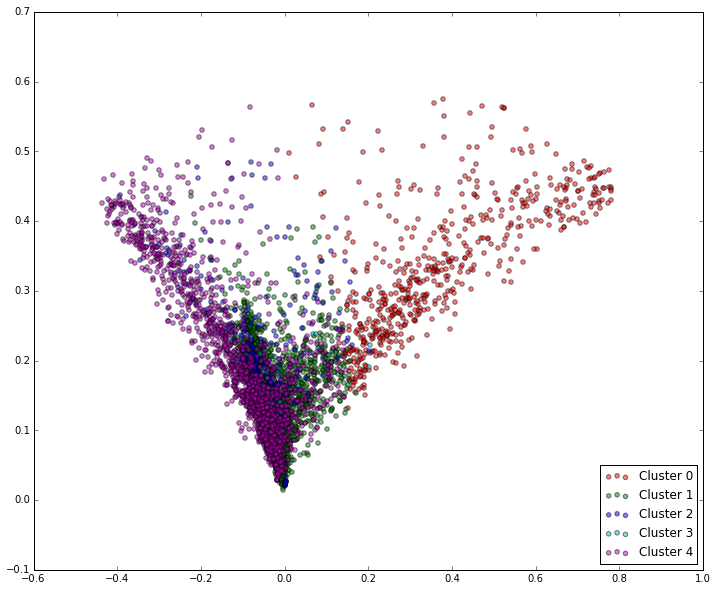

In [63]:
draw_cluster(5, term_mat, kmeans.labels_)

## Hierarchisches Clustering

## Hierarchisches Clustering - Theorie
- Auch hier ist wieder die Entfernung von Punkte zueinander entscheidend.
- Es werden solange die zwei jeweils nächsten Punkte verschmolzen, bis es nur noch einen Punkt gibt.
- Der Vorteil des Verfahrens ist ein schöne Darstellung der Nähe der jeweiligen Cluster

## Hierarchisches Clustering - Beispiel

<center>
<img  src="bilder/clust_3.png" class="bspic" width=700 />
</center>

## Hierarchisches Clustering - In der Praxis

In [64]:
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from scipy.cluster.hierarchy import ward, dendrogram
from sklearn.decomposition import TruncatedSVD
def draw_hier_tree_2(term_matrix,dims = 50, docs = 500):
    plt.figure(figsize=(12,10)) 
    tsvd = TruncatedSVD(n_components=dims)
    red_dim = tsvd.fit_transform(term_matrix[:docs])
    dist = 1 - cosine_similarity(red_dim)
    dend = dendrogram(ward(dist))
    plt.tight_layout() 
    plt.show()

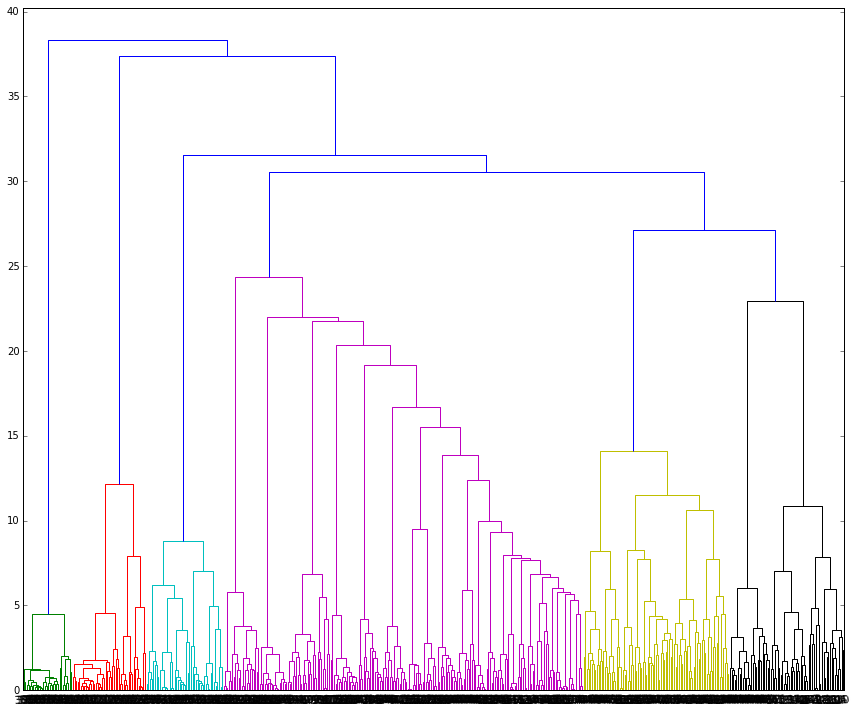

In [65]:
draw_hier_tree_2(term_mat)

# Classification

## Classification - Prozess
Classification ist ein Supervised Prozess. Label beschreiben die Klassenzugehörigkeit und werden dann zur Vorhersage genutzt.

<center>
<img class="logo" src="bilder/process2.png" class="bspic" width=700 />
</center>

## Classification - Ausprägungen
Klassifikation kann zwischen zwei Klassen, mehreren Klassen, oder hierarchisch stattfinden

<center>
<img class="logo" src="bilder/class_1_1.png" class="bspic" width=900 />
</center>

# Classification - OneVersusAll
- Eine Möglichkeit, mehrere Klassen zu betrachten, ist der Vergleich mit den Dokumenten aller jeweils anderen Klassen
- Die beste Klasse ist dann jene, die sich am Besten von der kombinierten Klaase abgrenzen lässt.

<center>
<img class="logo" src="bilder/class_2.png" class="bspic" width=700 />
</center>

# Classification - Wahrscheinlichkeiten
- Neben der reinen Klassenzugehörigkeit ist oft die Wahrscheinlichkeit der Zugehörigkeit interessant
- Ab welcher Wahrscheinlichkeit der Zugehörigkeit wird etwas getan, z.B. ein Dokument als relevant gewertet?

<center>
<img class="logo" src="bilder/class_3.png" class="bspic" width=700 />
</center>

## Vorbereitung der Daten
Aufteilung in einen Validierungs und einen Trainingssatz, jeweils mit Dokumenen und Labeln

In [66]:
from sklearn.cross_validation import train_test_split
splitted = train_test_split(term_mat,target_classes,test_size=0.25, random_state=42)
train_dtm, test_dtm, train_target, test_target = splitted

## Decision Trees

## Decision Trees - Die Theorie
- Der grundlegende Gedanke ist, ein Feature auszuwählen, das die Dokument möglichst gut nach Label trennt.
- Das Verfahren wird dann für die 'Äste' wiederholt.

## Decision Trees - Die Umsetzung

In [67]:
from sklearn import tree
def classify_tree(term_matrix, targets):
    clf = tree.DecisionTreeClassifier(criterion="entropy",max_leaf_nodes = 100)
    clf = clf.fit(term_matrix,targets)
    return clf
    
clf = classify_tree(train_dtm.todense(), train_target)

In [68]:
import os
tree.export_graphviz(clf,feature_names = idf_vec.get_feature_names(), max_depth = 5 ,out_file='tree.dot')                
!dot -Tpng tree.dot -o tree.png 

## Der Entscheidungsbaum

<center>
<img  src="tree.png" class="bspic" width=1000 />
</center>

In [77]:
!open tree.png

## Naive Bayes


## Naive Bayes - Die Theorie

Die Formel sieht komplex aus:
$$ P(c|d)\propto P(c)\prod _{ 1\le k\le { n }_{ d } }^{  }{ P({ t }_{ k }|c) } $$
Der Wesentliche Gedanke ist, dass die Klassenzugehörig von zwei Aspekten abhängt:
- Der Wahrscheinlichkeit der Klasse
- Die multiplizierte Wahrscheinlichkeit für jeden Term, dass dieser in der Klasse erscheint.

## Naive Bayes - Praxis und Evaluation

In [70]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.cross_validation import train_test_split
splitted = train_test_split(term_mat,target_classes,test_size=0.25, random_state=42)
train_dtm, test_dtm, train_target, test_target = splitted
bayes_cls = MultinomialNB()
bayes_cls = bayes_cls.fit(train_dtm,train_target)
bayes_pred_cls = bayes_cls.predict(test_dtm)
cm = confusion_matrix(test_target, bayes_pred_cls)
classes = bayes_cls.classes_
def plot_confusion_matrix(cm, classes, cmap=plt.cm.Blues):
    plt.figure(figsize=(12,10)) 
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    

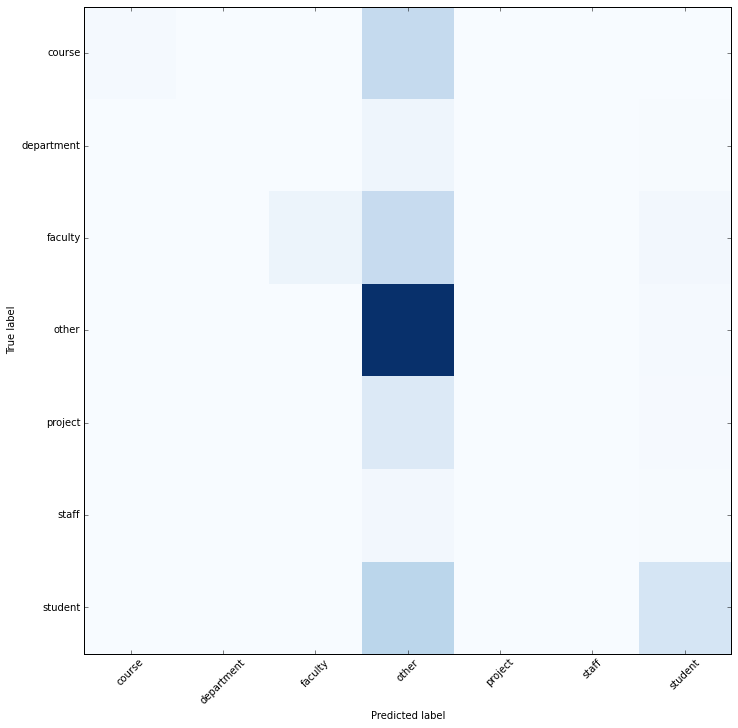

In [71]:
plot_confusion_matrix(cm,classes)

## Validierung anhand der Wahrscheinlichkeit - ROC Kurven

In [72]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.naive_bayes
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

import warnings
warnings.filterwarnings('ignore')

def draw_roc(term_mat,target_classes):
    classes = np.array(['project', 'course', 'other', 'student', 'faculty', 'department', 'staff'])
    target_classes_bin = label_binarize(target_classes, classes=classes)
    splitted = train_test_split(term_mat,target_classes_bin,test_size=0.25, random_state=42)
    train_dtm, test_dtm, train_target, test_target = splitted
    classifier = OneVsRestClassifier(sklearn.naive_bayes.MultinomialNB())
    y_score = classifier.fit(train_dtm, train_target).predict_proba(test_dtm)

    plt.figure()
    plt.figure(figsize=(12,10)) 
    for i in range(len(classes)):
        fpr, tpr, _ = roc_curve(test_target[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label='%s, area:%.2f' % (classes[i],roc_auc))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.show()
    

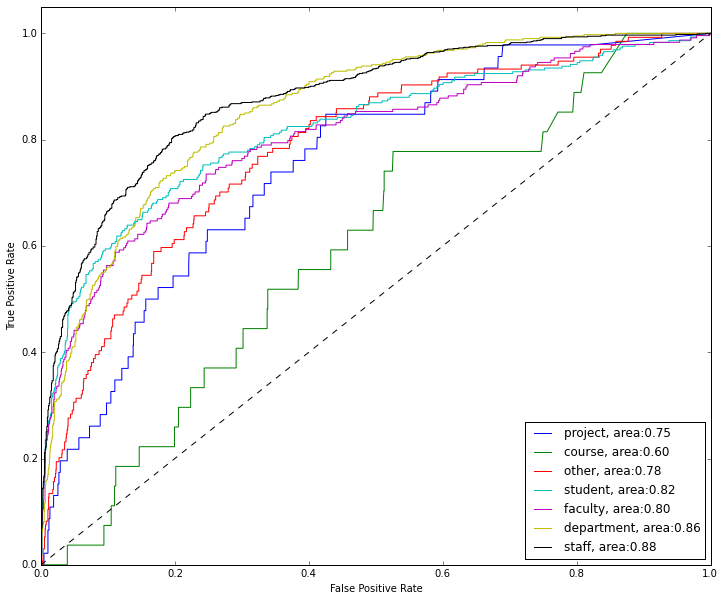

In [73]:
draw_roc(term_mat,target_classes)

# Ende - Abschluss und Ausblick

## Wichtige Punkte
- Classification und Clustering für Texte sind verbreite Verfahren
- In den Grundzügen einfach zu verstehen und einzusetzen
- Eine gute Umsetzung ist nicht einfach
    - Es gibt eine Vielzahl von Wahlmöglichkeiten bei den Verfahren
    - Das Verständnis der Daten ist wichtig
    - Die Vorbereitung von Features können leicht 80% der Arbeit sein

## Mehr zum Entdecken

<center>
<img class="logo" src="ml_map.png" class="bspic" width=700 />
</center>


In [74]:
from IPython.display import display, HTML
s = """

<style>

.rendered_html {
    font-family: "proxima-nova", helvetica;
    font-size: 120%;
    line-height: 1.3;
}

.rendered_html h1 {
    margin: 0.25em 0em 0.5em;
    color: #015C9C;
    text-align: center;
    line-height: 1.2; 
    page-break-before: always;
}

.rendered_html h2 {
    margin: 1.1em 0em 0.5em;
    color: #26465D;
    line-height: 1.2;
}

.rendered_html h3 {
    margin: 1.1em 0em 0.5em;
    color: #002845;
    line-height: 1.2;
}

.rendered_html li {
    line-height: 1.2; 
}

.prompt {
    font-size: 110%; 
}

.CodeMirror-lines {
    font-size: 110%; 
}

.output_area {
    font-size: 110%; 
}


h1.bigtitle {
    margin: 4cm 1cm 4cm 1cm;
    font-size: 300%;
}

h3.point {
    font-size: 200%;
    text-align: center;
    margin: 2em 0em 2em 0em;
    #26465D
}

.sbpic {
    margin: 10px 10px 10px 10px;
}

a.anchor-link {
    display: none;
}

h1.title { 
    font-size: 250%;
}


.CodeMirror-code { width:100% !important; }

.container { width:100% !important; }

</style>
"""


display(HTML(s))

from IPython.html.services.config import ConfigManager
from IPython.utils.path import locate_profile
cm = ConfigManager(profile_dir=locate_profile(get_ipython().profile))
cm.update('livereveal', {
              'width': 1024,
              'height': 768,
})

{u'height': 768, u'width': 1024}